<a href="https://colab.research.google.com/github/AndreiMoraru123/ObjectTracking/blob/main/lesson07_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab environment

In [ ]:
!python --version

Python 3.7.13


In [ ]:
!pip list | grep torch

torch                         1.11.0+cu113
torchaudio                    0.11.0+cu113
torchsummary                  1.5.1
torchtext                     0.12.0
torchvision                   0.12.0+cu113


In [ ]:
# Daca vrem sa vedem cu ce fel de nvidia-gpu este echipat environmentul nostru 

!nvidia-smi

# Este în regulă să rulați acest notebook fără un GPU!

Tue May 17 13:43:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Ne amintim de modelul de regresie lineara

x: (50, 1), weights: (1, 1), bias: (1,), y: (50, 1)


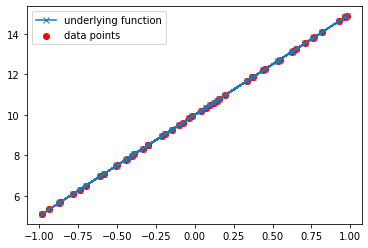

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# x is 1-dimensional

n = 50

d = 1
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true 
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(x, y_true, marker='x', label='underlying function')
plt.scatter(x, y_true, marker='o', color='red', label='data points')
plt.legend()

### Basic prediction function: Linear

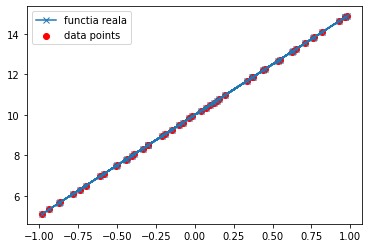

In [ ]:
# Să inițializăm predicțiile noastre

class Linear:
  def __init__(self, input_dim, num_hidden=1):
    # Inițializarea este importantă pentru a face față în mod corespunzător diferitelor
    # dimensiune de input input
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x)
plt.plot(x, y_true, marker='x', label='functia reala')
plt.scatter(x, y_true, marker='o', color='red', label='data points')
plt.legend()

### Basic loss function: MSE


In [ ]:
# Cât de greșite sunt aceste predicții inițiale, mai exact?
# Depinde de noi, iar definiția noastră se numește funcție de pierdere.
# Să folosim eroarea medie pătrată (Mean Squared Error- MSE) ca funcție de pierdere (loss function).

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_true - y_pred) ** 2).mean()
  
loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 105.98714278097043


### Add back propagation

In [ ]:
# Să folosim gradient descent pentru a învăța parametrii și bias-ul care minimizează loss funcția.
# Pentru aceasta, avem nevoie de gradientul loss funcției și de gradientul funcției liniare.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
# Facem un pas înainte și unul înapoi (forward pass and backward pass) pentru a vă asigura că nu sunt erori si functia loss scade.
loss = MSE()
linear = Linear(d)
y_pred = linear(x)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

108.76098542180898
70.89154084363467


### Train using gradient descent!

Epoca 0, loss 107.45649706704076
Epoca 5, loss 13.372320555197309
Epoca 10, loss 2.3925230603366914
Epoca 15, loss 0.7518437981514943
Epoca 20, loss 0.336369070756902
Epoca 25, loss 0.16810983062516524
Epoca 30, loss 0.08619623206287283
Epoca 35, loss 0.04443718377430706


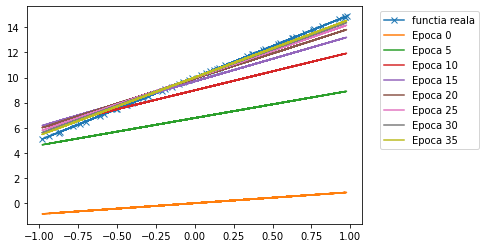

In [ ]:
plt.plot(x, y_true, marker='x', label='functia reala')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoca {epoch}, loss {loss_value}')
    plt.plot(x, y_pred.squeeze(), label=f'Epoca {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

### 2-dimensional inputs work, too

(100, 2) (2, 1) (1,)
x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


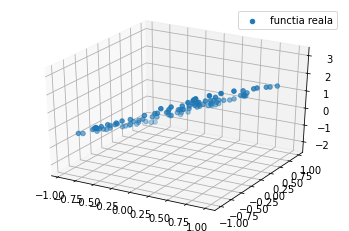

In [ ]:
# Sa incercam cu un x bidimensional

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])
print(x.shape, weights_true.shape, bias_true.shape)

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='functia reala')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='functia noastra')
  plt.legend()

plot_3d(x, y_true)

0.5977136414879722


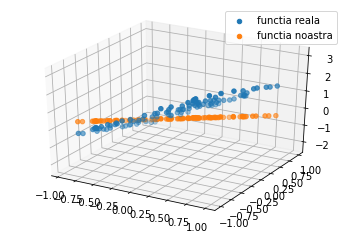

In [ ]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoca 0, loss 0.5977136414879722
Epoca 1, loss 0.47875964829921513
Epoca 2, loss 0.39048561140211396
Epoca 3, loss 0.3233805692046374
Epoca 4, loss 0.2711668045849319
Epoca 5, loss 0.22965804996093084
Epoca 6, loss 0.1960267875099831
Epoca 7, loss 0.16833328283947796
Epoca 8, loss 0.14522217658857314
Epoca 9, loss 0.1257264346277039
Epoca 10, loss 0.1091401639120963
Epoca 11, loss 0.09493567022752136
Epoca 12, loss 0.082708997097007
Epoca 13, loss 0.07214385019575378
Epoca 14, loss 0.06298743367283624
Epoca 15, loss 0.05503404149222238
Epoca 16, loss 0.04811372948858435
Epoca 17, loss 0.04208434328905345
Epoca 18, loss 0.036825785873902575
Epoca 19, loss 0.03223579919406147


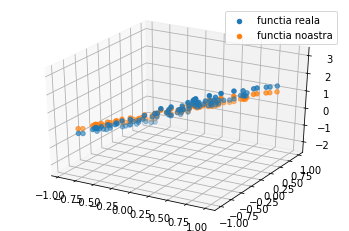

In [ ]:
from typing import Callable

def fit(X_train: np.ndarray, y_train: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    # train
    y_pred = model(X_train)
    loss_value = loss(y_pred, y_train)
    print(f'Epoca {epoch}, loss {loss_value}')

    # update
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Regresia cu o retea neuronala
Așadar, avem acum o modalitate de a ajusta automat o funcție liniară la date N-dimensionale.

Cum se poate face ca acest lucru să funcționeze pentru datele neliniare?


x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


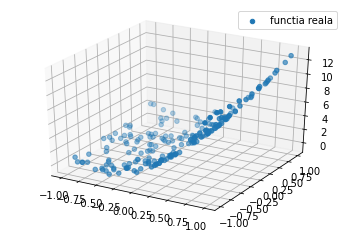

In [ ]:
# Ce se intampla daca dependenta dintre featuers si functia ipoteza nu este una lineara?

n = 200
d = 2
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoca 0, loss 17.708816015511104
Epoca 1, loss 13.858823012369571
Epoca 2, loss 11.189377202217534
Epoca 3, loss 9.301083078658268
Epoca 4, loss 7.93535532315862
Epoca 5, loss 6.92399053649195
Epoca 6, loss 6.156902619762599
Epoca 7, loss 5.561465956714
Epoca 8, loss 5.089278518139343
Epoca 9, loss 4.7076694426604915
Epoca 10, loss 4.3942416760206084
Epoca 11, loss 4.13335730191194
Epoca 12, loss 3.9138673611465524
Epoca 13, loss 3.7276397618048627
Epoca 14, loss 3.568599762316221
Epoca 15, loss 3.432100310229706
Epoca 16, loss 3.3145052211992394
Epoca 17, loss 3.2129101849302195
Epoca 18, loss 3.1249534459231585
Epoca 19, loss 3.0486851933401113
Epoca 20, loss 2.982475698029914
Epoca 21, loss 2.9249492862611337
Epoca 22, loss 2.874935764051264
Epoca 23, loss 2.8314338136410875
Epoca 24, loss 2.793582756480802
Epoca 25, loss 2.7606402869633957
Epoca 26, loss 2.731964565835828
Epoca 27, loss 2.7069995738247727
Epoca 28, loss 2.6852629618608805
Epoca 29, loss 2.666335856707717
Epoca 30, 

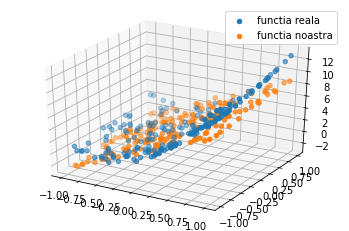

In [ ]:
# Ne putem antrena foarte bine, dar loss-ul final va rămâne mare, deoarece funcția noastră liniară 
# este incapabilă sa reprezinte datele


loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [ ]:
# Pentru a învăța funcții neliniare, avem nevoie de neliniarități în modelul nostru.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # Apropo, asa poti face debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

18.34566600746828


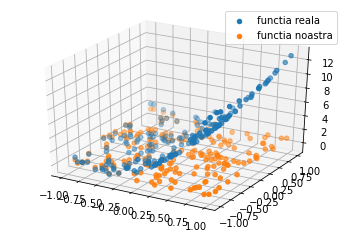

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden, 1)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [ ]:
# Testam un singur forward si backward pass
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

22.280181533387527
8.107241132029399


Epoca 0, loss 8.107241132029399
Epoca 1, loss 3.3473855443246077
Epoca 2, loss 2.1176374760017067
Epoca 3, loss 1.522518064004706
Epoca 4, loss 1.1573707773336543
Epoca 5, loss 0.9186952719465497
Epoca 6, loss 0.7545046220545412
Epoca 7, loss 0.6390732405786388
Epoca 8, loss 0.5547833479863052
Epoca 9, loss 0.4910532985785535
Epoca 10, loss 0.44139753118756353
Epoca 11, loss 0.40185171670598124
Epoca 12, loss 0.3699161689022947
Epoca 13, loss 0.34335117866867565
Epoca 14, loss 0.32099589691860486
Epoca 15, loss 0.30168094715673993
Epoca 16, loss 0.28445941319943335
Epoca 17, loss 0.2689124951371712
Epoca 18, loss 0.2552446980569715
Epoca 19, loss 0.24329414691360834
Epoca 20, loss 0.23282839328659705
Epoca 21, loss 0.22363170267529292
Epoca 22, loss 0.21549666246275984
Epoca 23, loss 0.20822786022942683
Epoca 24, loss 0.20171182123544595
Epoca 25, loss 0.19596221854317095
Epoca 26, loss 0.19084906144712252
Epoca 27, loss 0.18624797118037253
Epoca 28, loss 0.18198158918152807
Epoca 29, 

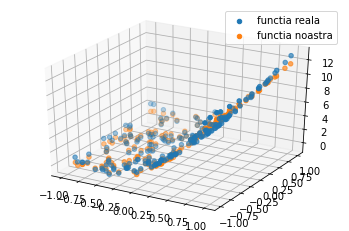

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x))

### Same thing, in PyTorch

In [ ]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, 1)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.3399, grad_fn=<MseLossBackward0>)


In [ ]:
# Testam un singur forward si backward pass
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(21.3399, grad_fn=<MseLossBackward0>)
tensor(16.3356, grad_fn=<MseLossBackward0>)


tensor(16.3356, grad_fn=<MseLossBackward0>)
tensor(13.5506, grad_fn=<MseLossBackward0>)
tensor(11.1811, grad_fn=<MseLossBackward0>)
tensor(8.9769, grad_fn=<MseLossBackward0>)
tensor(7.0372, grad_fn=<MseLossBackward0>)
tensor(5.4181, grad_fn=<MseLossBackward0>)
tensor(4.1337, grad_fn=<MseLossBackward0>)
tensor(3.1777, grad_fn=<MseLossBackward0>)
tensor(2.4675, grad_fn=<MseLossBackward0>)
tensor(1.9418, grad_fn=<MseLossBackward0>)
tensor(1.5479, grad_fn=<MseLossBackward0>)
tensor(1.2562, grad_fn=<MseLossBackward0>)
tensor(1.0415, grad_fn=<MseLossBackward0>)
tensor(0.8861, grad_fn=<MseLossBackward0>)
tensor(0.7767, grad_fn=<MseLossBackward0>)
tensor(0.6980, grad_fn=<MseLossBackward0>)
tensor(0.6393, grad_fn=<MseLossBackward0>)
tensor(0.5954, grad_fn=<MseLossBackward0>)
tensor(0.5606, grad_fn=<MseLossBackward0>)
tensor(0.5331, grad_fn=<MseLossBackward0>)
tensor(0.5111, grad_fn=<MseLossBackward0>)
tensor(0.4930, grad_fn=<MseLossBackward0>)
tensor(0.4777, grad_fn=<MseLossBackward0>)
tensor(0

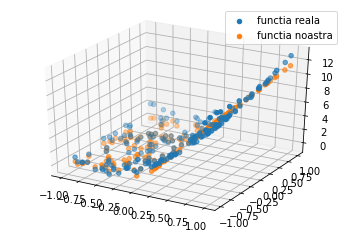

In [ ]:
# Acum rulam ciclul de antrenare (training loop)

def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, model(x_tensor).detach())

# Sa examinam un set de date real:

In [ ]:
!mkdir data && curl -o data/headbrain.csv -LJO https://github.com/dianaartiom/machine_learning_with_python/raw/main/lesson05/notebooks/data/headbrain.csv

mkdir: cannot create directory ‘data’: File exists


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [ ]:
data = pd.read_csv('data/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
# Collecting X and Y
y = data['Brain Weight(grams)'].values
X = data.drop(['Brain Weight(grams)'], axis=1).values

In [ ]:
mm_scaler = MinMaxScaler()

In [ ]:
X = mm_scaler.fit_transform(X)
y = mm_scaler.fit_transform(y.reshape(-1,1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Test just one forward and backward step
loss = MSE()
d = X_train.shape[1]
model = Model(d, 10)
y_pred = model(X_train)
loss_value = loss(y_pred, y_train)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(X_train)
loss_value = loss(y_pred, y_train)
print(loss_value)

0.7371747447713911
0.3004323678369676


In [ ]:
from typing import Callable

def fit(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  train_loss, test_loss = [], []
  for epoch in range(num_epochs):
    # train
    y_pred = model(X_train)
    loss_value = loss(y_pred, y_train)
    train_loss.append(loss_value)

    # test
    y_pred_test = model(X_test)
    loss_value_test = loss(y_pred_test, y_test)
    test_loss.append(loss_value_test)

    # update
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)
    
  return train_loss, test_loss

In [ ]:
train_loss, test_loss = fit(X_train, y_train, X_test, y_test, model=model, loss=loss, lr=0.1, num_epochs=40)

Epoch 0, loss 0.3004323678369676
Epoch 1, loss 0.19588996051187102
Epoch 2, loss 0.1515840622492487
Epoch 3, loss 0.12447532720332104
Epoch 4, loss 0.10484552608304311
Epoch 5, loss 0.08973562810321932
Epoch 6, loss 0.07784468825697742
Epoch 7, loss 0.06837444424722171
Epoch 8, loss 0.06076009935667508
Epoch 9, loss 0.05456184506815288
Epoch 10, loss 0.049511241273869376
Epoch 11, loss 0.04540461996630053
Epoch 12, loss 0.04203229454685005
Epoch 13, loss 0.03922691225835351
Epoch 14, loss 0.03689757571976239
Epoch 15, loss 0.03490606215082718
Epoch 16, loss 0.03323621690862681
Epoch 17, loss 0.03181820377258434
Epoch 18, loss 0.03053441078671644
Epoch 19, loss 0.02945341402326834
Epoch 20, loss 0.028523588856148106
Epoch 21, loss 0.027714470437475228
Epoch 22, loss 0.027025505535527163
Epoch 23, loss 0.02642632148282616
Epoch 24, loss 0.025882336602067388
Epoch 25, loss 0.02539471956781442
Epoch 26, loss 0.024951430559884847
Epoch 27, loss 0.024543286627471395
Epoch 28, loss 0.02417532

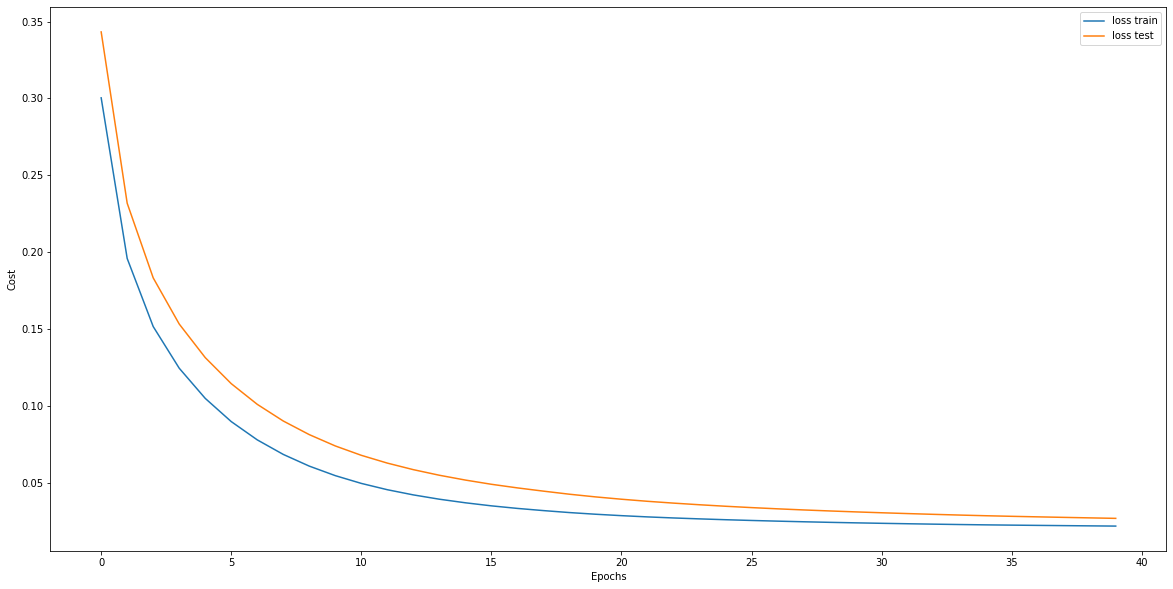

In [ ]:
def plot_losses(train_loss, test_loss, xlabel='Epochs', ylabel='Cost'):
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.legend(['loss train','loss test'])
    plt.show()
    
plot_losses(train_loss, test_loss)

Sa vedem care este eroarera pe setul de test:

In [ ]:
y_pred_test = model(X_test)
loss_value_test = loss(y_pred_test, y_test)
print(loss_value_test)

0.026454128441360438


In [ ]:
loss = MSE()
linear = Linear(X_train.shape[1])
linear_loss_train, linear_loss_test = fit(X_train, y_train, X_test, y_test, model=linear, loss=loss, lr=0.1, num_epochs=40)

Epoch 0, loss 0.7947274428892729
Epoch 1, loss 0.7200243513099635
Epoch 2, loss 0.653238704094556
Epoch 3, loss 0.5932212836623159
Epoch 4, loss 0.5391274566617826
Epoch 5, loss 0.49028816493701155
Epoch 6, loss 0.4461459069898678
Epoch 7, loss 0.40622116145833337
Epoch 8, loss 0.3700934903381081
Epoch 9, loss 0.3373899940637538
Epoch 10, loss 0.30777762849984996
Epoch 11, loss 0.28095767105475694
Epoch 12, loss 0.25666146438592524
Epoch 13, loss 0.23464697520832012
Epoch 14, loss 0.21469591091818346
Epoch 15, loss 0.1966112433373546
Epoch 16, loss 0.1802150463598222
Epoch 17, loss 0.16534658649788092
Epoch 18, loss 0.1518606241098676
Epoch 19, loss 0.13962589449512847
Epoch 20, loss 0.1285237452589161
Epoch 21, loss 0.11844691111972838
Epoch 22, loss 0.10929841062889813
Epoch 23, loss 0.10099055165740621
Epoch 24, loss 0.0934440343074736
Epoch 25, loss 0.08658714132435354
Epoch 26, loss 0.08035500723799381
Epoch 27, loss 0.07468895843053812
Epoch 28, loss 0.06953591715232227
Epoch 29,

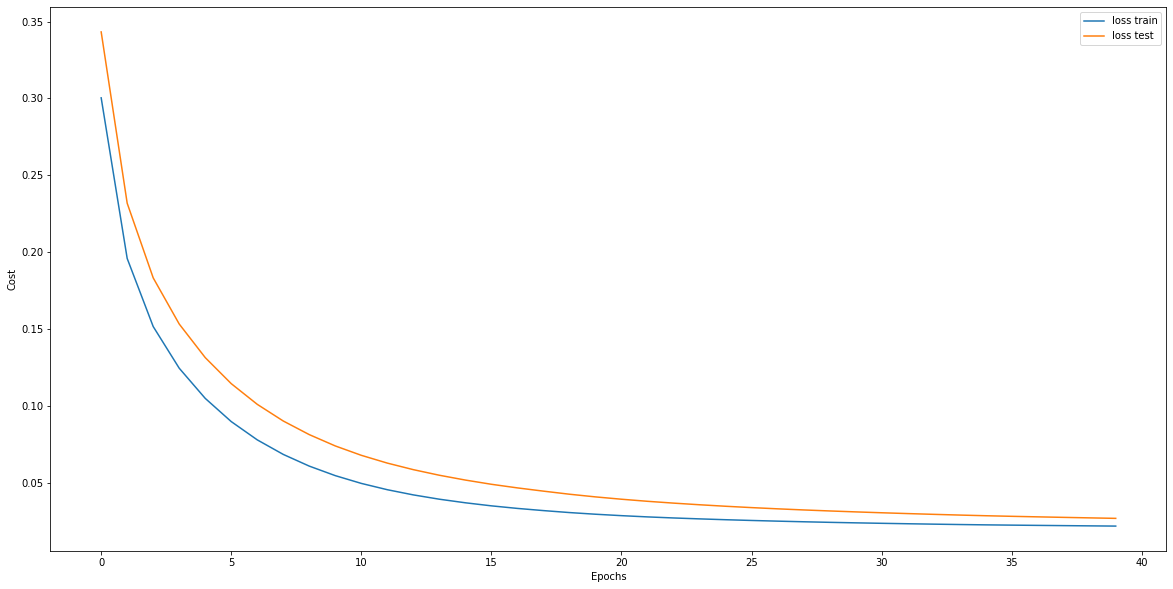

In [ ]:
plot_losses(train_loss, test_loss)

In [ ]:
y_pred_test = linear(X_test)
loss_value_test = loss(y_pred_test, y_test)
print(loss_value_test)

0.024555699086751866


Implementarea cu sklearn

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

sk_model = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred_train_sk = sk_model.predict(X_train)
y_pred_test_sk = sk_model.predict(X_test)

print("Sklearn train loss value: ", mean_squared_error(y_pred_train_sk, y_train))
print("Sklearn test loss value: ", mean_squared_error(y_pred_test_sk, y_test))

Sklearn train loss value:  0.01418001427754587
Sklearn test loss value:  0.012913410999447783


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
